In [1]:
#pip install nltk
#nltk.download('all')
#nltk.download('wordnet')
#nltk.download('stopwords')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [3]:
df1=pd.read_csv("politics.csv")
df2=pd.read_csv("sports.csv")
df3=pd.read_csv("music.csv")

In [4]:
df=pd.concat([df1,df2,df3])

In [5]:
df=df.sample(frac=1)

In [6]:
print(df.columns)

Index(['Unnamed: 0', 'Tweet', 'Date', 'Like', 'Retweet', 'Comment', 'Output'], dtype='object')


In [7]:
df=df.drop('Date',axis=1)
df=df.drop('Unnamed: 0',axis=1)

In [8]:
df.head()

,Tweet,Like,Retweet,Comment,Output
49,वंदे भारत ट्रेन भारत की स्पीड और स्केल दोनों क...,5663,1973,146,Politics
19,A very special moment from Tripura earlier tod...,11075,2695,389,Politics
47,इस बार का बजट मध्यम वर्ग को और मजबूती देने का ...,7290,2275,415,Politics
23,"""Our thoughts and prayers are with the victims...",420,57,7,Sports
41,वंदे भारत रेल्वेगाडी भारताची गती आणि व्याप्ती ...,5104,1779,128,Politics


In [9]:
#remove link and emoji
def preprocess(text):
    text=re.sub(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))",'',text)
    text=text.strip().replace('\n', '')
    text="".join([i for i in text if i not in string.punctuation])
    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
    text=emoji_pattern.sub(r'', text)
    
    text=re.sub(r'\s+', ' ', text)
    return text.lower()

In [10]:
#function call to preprocess content of tweet is put in preprocessed text 
df['preprocess_text1']=df['Tweet'].apply(lambda x: preprocess(x))

In [11]:
df.head()

,Tweet,Like,Retweet,Comment,Output,preprocess_text1
49,वंदे भारत ट्रेन भारत की स्पीड और स्केल दोनों क...,5663,1973,146,Politics,वंदे भारत ट्रेन भारत की स्पीड और स्केल दोनों क...
19,A very special moment from Tripura earlier tod...,11075,2695,389,Politics,a very special moment from tripura earlier tod...
47,इस बार का बजट मध्यम वर्ग को और मजबूती देने का ...,7290,2275,415,Politics,इस बार का बजट मध्यम वर्ग को और मजबूती देने का ...
23,"""Our thoughts and prayers are with the victims...",420,57,7,Sports,our thoughts and prayers are with the victims ...
41,वंदे भारत रेल्वेगाडी भारताची गती आणि व्याप्ती ...,5104,1779,128,Politics,वंदे भारत रेल्वेगाडी भारताची गती आणि व्याप्ती ...


In [12]:
#tokenization and lemitization
def preprocess_more(text):
    tokens = re.split(' ',text)
    stopwords=nltk.corpus.stopwords.words('english')
    tokens= [i for i in tokens if i not in stopwords]
    lemmatizer=WordNetLemmatizer()
    lemm_text = [lemmatizer.lemmatize(word) for word in tokens]
    lemm_text=" ".join(lemm_text)
    return lemm_text

In [13]:
df['preprocess_text']=df['preprocess_text1'].apply(lambda x: preprocess_more(x))

In [14]:
#actual tweet droped actual text emoji removed
df=df.drop('Tweet',axis=1)
df=df.drop('preprocess_text1',axis=1)

In [15]:
df.columns

Index(['Like', 'Retweet', 'Comment', 'Output', 'preprocess_text'], dtype='object')

In [16]:
X=df[['Like', 'Retweet', 'Comment','preprocess_text']]

In [17]:
y=df['Output']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [19]:
X_train.shape

(272, 4)

In [20]:
X_train.head()

,Like,Retweet,Comment,preprocess_text
3,107141,6968,1629,motivating hoe
62,124,11,8,part programme fifa delivered 38900 football s...
40,6503,1948,227,सार्वजनिक वाहतूक व्यवस्था जेवढी आधुनिक बनेल ते...
23,371,31,13,expensiveprada puuurrrrr
30,9059,634,1106,necessarily cause bring enough awareness infla...


In [21]:
X_train_text=X_train['preprocess_text']
X_test_text=X_test['preprocess_text']

In [22]:
tf_idf=TfidfVectorizer(ngram_range=(1,2)) 

In [23]:
text_feature_train=tf_idf.fit_transform(X_train_text)
text_feature_test=tf_idf.transform(X_test_text)

In [24]:
x_train=X_train.drop('preprocess_text',axis=1)
x_test=X_test.drop('preprocess_text',axis=1)

In [25]:
x_train.shape

(272, 3)

In [26]:
X_train=x_train.values
X_test=x_test.values

In [27]:
#google meaning
x_train=np.hstack((X_train,text_feature_train.toarray()))
x_test=np.hstack((X_test,text_feature_test.toarray()))

In [28]:
y_test

68     Politics
31     Politics
100    Politics
17        Music
98       Sports
87       Sports
72        Music
96        Music
20        Music
93        Music
31       Sports
48        Music
100      Sports
12        Music
63        Music
39     Politics
47     Politics
4      Politics
71       Sports
45     Politics
60        Music
26     Politics
95     Politics
43        Music
54        Music
7      Politics
92        Music
79       Sports
41        Music
31        Music
80       Sports
Name: Output, dtype: object

In [29]:
#3 the category poli 1 entertai 0 sports 2
cv=LabelEncoder()

In [30]:
y_train=cv.fit_transform(y_train)
y_test=cv.transform(y_test)

In [31]:
y_test

array([1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1,
       1, 0, 0, 1, 0, 2, 0, 0, 2])

In [32]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [33]:
y_pred=nb.predict(x_test)

In [34]:
cm=confusion_matrix(y_test,y_pred)
cm


array([[7, 5, 2],
       [0, 7, 3],
       [0, 0, 7]], dtype=int64)

In [35]:
print("Gaussian Naive Bias")
print(accuracy_score(y_test,y_pred)*100)


recall=recall_score(y_test,y_pred,average='weighted')*100
print("recall score: ", recall)
precision=precision_score(y_test,y_pred,average='weighted')*100
print("precision score: ",precision)
f1=f1_score(y_test,y_pred,average='weighted')*100
print("f1 score: ",f1)

Gaussian Naive Bias
67.74193548387096
recall score:  67.74193548387096
precision score:  77.15053763440862
f1 score:  67.27375623810259


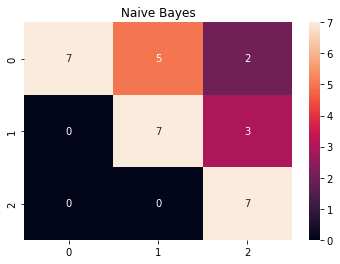

In [36]:
import seaborn as sn
sn.heatmap(cm,annot=True).set(title='Naive Bayes')
plt.show()

In [37]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred1=lr.predict(x_test)

In [39]:
cm=confusion_matrix(y_test,y_pred)
cm


array([[7, 5, 2],
       [0, 7, 3],
       [0, 0, 7]], dtype=int64)

In [40]:
print("Logistic Regression")

print(accuracy_score(y_test,y_pred)*100)
recall=recall_score(y_test,y_pred,average='weighted')*100
print("recall score: ", recall)
precision=precision_score(y_test,y_pred,average='weighted')*100
print("precision score: ",precision)
f1=f1_score(y_test,y_pred,average='weighted')*100
print("f1 score: ",f1)

Logistic Regression
67.74193548387096
recall score:  67.74193548387096
precision score:  77.15053763440862
f1 score:  67.27375623810259


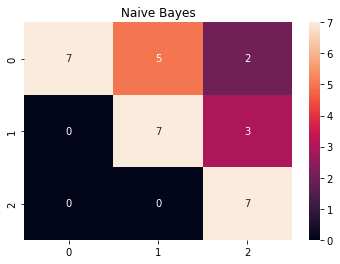

In [41]:
import seaborn as sn
sn.heatmap(cm,annot=True).set(title='Naive Bayes')
plt.show()